In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
# sigmoid 함수
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [3]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        
        self.name = name
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def print_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        print('[DataGeneration]  ', str_of_kind, ' target value = ', dict(zip(unique, counts)).items())

        num_zeros = dict(zip(unique, counts))[0.0]  # key 0.0 에 대한 value 값 count 리턴
        num_ones = dict(zip(unique, counts))[1.0]  # key 1.0 에 대한 value 값 count 리턴

        print('[DataGeneration]  ', str_of_kind, ' zeros numbers = ', num_zeros, ', ratio = ', 100 * num_zeros / (data.shape[0]), ' %')
        print('[DataGeneration]  ', str_of_kind, ' ones numbers = ', num_ones, ', ratio = ', 100 * num_ones / (data.shape[0]), '%') 
    
        print('=======================================================================================================')
        
        
    # shuffle 기능을 이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.print_target_distribution(loaded_data, 'original data')
        
        
        # random.shuffle() 이용한 데이터 인덱스 분리 및 트레이닝/테스트 데이터 생성
        
        # 임시 저장 리스트
        training_data_list = []
        test_data_list = []

        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        #print("[DataGeneration]  total_data_num = ", total_data_num, ", test_data_num = ", test_data_num)

        # 전체 데이터 인덱스를 가지고 있는 리스트 생성
        total_data_index_list = [ index for index in range(total_data_num) ]

        # random.shuffle 을 이용하여 인덱스 리스트 생성
        random.shuffle(total_data_index_list)  # 전체 인덱스가 랜덤하게 섞여진 리스트로 변형된다

        # test data 를 위한 인덱스는 total_data_index_list 로뷰터 앞에서 분리비율(seperation_rate)의 데이터 인덱스
        test_data_index_list = total_data_index_list[ 0:test_data_num ]

        #print("[DataGeneration]  length of test_data_index_list = ", len(test_data_index_list))

        # training data 를 위한 인덱스는 total_data_index_list 에서 test data 인덱스를 제외한 나머지 부분
        training_data_index_list = total_data_index_list[ test_data_num: ]

        #print("[DataGeneration]  length of training_data_index_list = ", len(training_data_index_list))

        # training data 구성
        for training_data_index in training_data_index_list:
    
            training_data_list.append(loaded_data[training_data_index])

        # test data 구성
        for test_data_index in test_data_index_list:
    
            test_data_list.append(loaded_data[test_data_index])

        # generate training data from training_data_list using np.arrya(...)
        training_data = np.array(training_data_list)

        # generate test data from test_data_list using np.arrya(...)
        test_data = np.array(test_data_list)

        # verification shape
        #print("[DataGeneration]  training_data.shape = ", training_data.shape)
        #print("[DataGeneration]  test_data.shape = ", test_data.shape)

        # print target distribution of generated data 
        
        self.print_target_distribution(training_data, 'training data')
        
        self.print_target_distribution(test_data, 'test data')
        
        
        # save training & test data (.csv)
        training_data_save_path = './' + self.name + '_training_data.csv'
        test_data_save_path = './' + self.name + '_test_data.csv'
        
        # 저장공간이 없거나 파일 write 실패시 exception 발생
        try:
            np.savetxt(training_data_save_path, training_data, delimiter=',')
            np.savetxt(test_data_save_path, test_data, delimiter=',')
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))
        
        return training_data, test_data

In [4]:
# DataGeneration 객체 생성.
# 생성된 training data / test data 에 대한 정답(target) 분포 확인

seperation_rate = 0.3 # 분리비율
target_position = -1

try:    
    # DataGeneration 이용한 training data / test data 분리
    
    data_obj = DataGeneration('Wine', './(191116)wine.csv', seperation_rate, target_position)

    (training_data, test_data) = data_obj.generate()
    
except Exception as err:
    
    print('Exception Occur !!')
    print(str(err))

[DataGeneration]  loaded_data.shape =  (6497, 13)
[DataGeneration]   original data  target value =  dict_items([(0.0, 4898), (1.0, 1599)])
[DataGeneration]   original data  zeros numbers =  4898 , ratio =  75.38864091118978  %
[DataGeneration]   original data  ones numbers =  1599 , ratio =  24.61135908881022 %
[DataGeneration]   training data  target value =  dict_items([(0.0, 3412), (1.0, 1136)])
[DataGeneration]   training data  zeros numbers =  3412 , ratio =  75.02198768689534  %
[DataGeneration]   training data  ones numbers =  1136 , ratio =  24.97801231310466 %
[DataGeneration]   test data  target value =  dict_items([(0.0, 1486), (1.0, 463)])
[DataGeneration]   test data  zeros numbers =  1486 , ratio =  76.2442278091329  %
[DataGeneration]   test data  ones numbers =  463 , ratio =  23.755772190867113 %


In [5]:
class Wine:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2  Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])  
                        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    # 손실함수
    def feed_forward(self):
        delta = 1e-7    # log 무한대 발산 방지
    
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    # 손실 값 계산
    def loss_val(self):
        delta = 1e-7    # log 무한대 발산 방지
    
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
   
    def predict(self, input_data):            
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        y = A3 = sigmoid(Z3)
        
        if y >= 0.5:
            predicted_num = 1
        else:
            predicted_num = 0
    
        return y, predicted_num
    
    # 정확도 측정함수
    def accuracy(self, input_data, target_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []
        
        # temp list which contains label and prediction in sequence
        temp_list = []
        
        for index in range(len(input_data)):
                        
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            (real_val, predicted_num) = self.predict(np.array(input_data[index], ndmin=2))     
            
            if predicted_num == target_data[index]:
                matched_list.append(index)
                
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(target_data[index])
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        print("Current Accuracy = ", len(matched_list)/(len(input_data)) )
        
        return matched_list, not_matched_list, index_label_prediction_list
    
        
    # 수치미분을 이용하여 손실함수가 최소가 될때 까지 학습하는 함수
    def train(self, input_data, target_data):
        self.input_data = input_data
        self.target_data = target_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)          
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)         
        self.b2 = self.b2 - self.learning_rate * loss_2

### [예제] 오차역전파를 이용한 Wine class 구현 및 검증

In [6]:
#hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 200  # hidden nodes 개수
o_nodes = 1    # output nodes 개수
lr = 1e-5      # learning rate
epochs = 200   # 반복횟수

loss_val_list = []

# Wine 객체 생성
obj = Wine(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for step in range(epochs):
    for index in range(len(training_data)):
        input_data = training_data[index, 0:-1]
        target_data = training_data[index, [-1]]
        
        obj.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))   # 꼭 행렬로 만들어서 넣기!!!!
        
    if (step % 10 == 0):
        print("epochs = ", step, "loss value = ", obj.loss_val())
        
    # 손실함수 값 저장
    loss_val_list.append(obj.loss_val())

end_time = datetime.now()
        
print("")
print("Elapsed Time => ", end_time - start_time)

epochs =  0 loss value =  1.0159773835853039
epochs =  10 loss value =  0.2989268237698393
epochs =  20 loss value =  0.26105246645367153
epochs =  30 loss value =  0.24809089038594842
epochs =  40 loss value =  0.23697070326915867
epochs =  50 loss value =  0.2260450606984573
epochs =  60 loss value =  0.21543110197066462
epochs =  70 loss value =  0.2052280347900169
epochs =  80 loss value =  0.1956096470061556
epochs =  90 loss value =  0.18674762753797
epochs =  100 loss value =  0.17870199180065835
epochs =  110 loss value =  0.1714296524977454
epochs =  120 loss value =  0.16483893906712477
epochs =  130 loss value =  0.15882902055227502
epochs =  140 loss value =  0.1533079726093356
epochs =  150 loss value =  0.1481984089131921
epochs =  160 loss value =  0.14343776280768036
epochs =  170 loss value =  0.13897717417392852
epochs =  180 loss value =  0.1347803966074027
epochs =  190 loss value =  0.13082242648564538

Elapsed Time =>  0:00:47.459078


In [9]:
test_input_data = test_data[ :, 0:-1 ]
test_target_data = test_data[ :, -1 ]

print("test_data.shape = ", test_data.shape)
print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))

(true_list, false_list, index_label_prediction_list) = obj.accuracy(test_input_data, test_target_data)

test_data.shape =  (1949, 13)
test_data[0,0] =  7.2 , len(test_data[0]) =  13
Current Accuracy =  0.9194458696767573


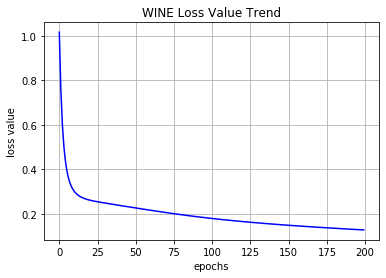

In [10]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list)):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('WINE Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()